In [178]:
#Starting implementation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [179]:
#Reading dataset and setting columns
df = pd.read_csv("/Users/jimmychu/Downloads/Lab_2/data/cardiac.csv")
df

,bhr,basebp,basedp,pkhr,sbp,dp,dose,maxhr,%mphr(b),mbp,...,newMI,newPTCA,newCABG,death,hxofHT,hxofdm,hxofcig,hxofMI,hxofPTCA,hxofCABG
0,92,103,9476,114,86,9804,40,100,74,121,...,0,0,0,0,0,0,0.0,1,1,0
1,62,139,8618,120,158,18960,40,120,82,158,...,1,0,0,0,0,1,0.0,1,0,0
2,62,139,8618,120,157,18840,40,120,82,157,...,1,0,0,0,0,1,0.0,1,0,0
3,93,118,10974,118,105,12390,30,118,72,105,...,0,0,0,0,0,0,0.0,0,0,0
4,89,103,9167,129,173,22317,40,129,69,176,...,0,0,0,0,0,0,0.0,0,0,0
5,58,100,5800,123,140,17220,40,123,83,140,...,0,0,0,0,0,0,0.0,1,0,1
6,63,120,7560,98,130,12740,40,98,71,130,...,0,0,0,0,0,0,0.0,1,0,0
7,86,161,13846,144,157,22608,40,144,111,157,...,0,0,0,0,0,0,0.0,0,0,0
8,69,143,9867,115,118,13570,40,113,81,151,...,0,0,0,0,0,0,0.0,0,0,0
9,76,105,7980,126,125,15750,40,126,94,125,...,0,0,0,0,0,0,0.0,0,0,0


In [180]:
x1 = df.values[:, 0:24]
x2 = df.values[:, 25:31]
y = df.values[:, 24]
x = np.concatenate([x1, x2], axis=1)
#x=sum(x1,x2)
#x = x1 + x2
#x.append(x1,x2)
#x.extend(x2)
#x = df.values[:, 0:24]
trainX, testX, trainY, testY = train_test_split( x, y, test_size = 0.3)


In [181]:
#Step 1 - Choosing Model - Import class which is planned to use
from sklearn import tree

In [182]:
#Step 2 - Instantiate the estimator
dtree = tree.DecisionTreeClassifier(criterion="entropy")

In [183]:
#Step 3 - Fit model with data (Learning)
dtree.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
#Step 4 - Predict the response for the testing set
Y_pred = dtree.predict(testX)
print(Y_pred)
print("Accuracy: \n", dtree.score(testX, testY))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy: 
 0.875


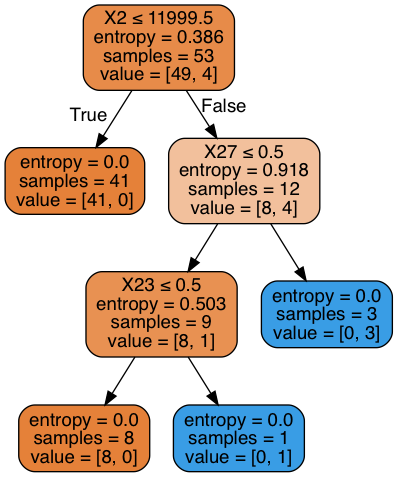

In [185]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())